<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-9-IP/blob/master/Naomi's_week_9_IP%2C_K_Nearest_Neighbors_(KNN)_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Using Titanic data implement KNN classifier to create a model that would accurately classify whether a passenger would survive or not, given the different feaures from the data

### b) Defining the Metric for Success

We will be using confusion matric and classification report to evaluate our model perfomance.
We aim to get an accuracy score of atleast 80%.

The accuracy score from classification report will be based on precision, recall, and f1 score

### c) Understanding the context 

Titanic was a passenger ship that sank in North Atlantic ocean in 1912 after striking an iceberg. It is reported that majority of the passengers died while a few of them survived.  

As a Data Scientist, you have been provided with the Titanic data to implement KNN classification by creating a model that would classify whether or not a passenger survived. Here is a description of the columns provided:

Survival — Survival	0 = No, 1 = Yes

Pclas — Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd

Sex — Male or Female

Age — Age in years	

Sibsp	— the number of siblings and spouses travelling with the passenger 

Parch	— the number of parents and children travelling with the passenger	

Ticket —	Ticket number

Fare — Passenger fare	

Cabin	— Cabin number

Embarked — Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton

### d) Recording the Experimental Design

Approach for the project will be as follows:

1. Understanding the business context

2. Reading and initial data exploration

3. Data validation

4. Tidying up the data

5. EDA

6. Implementing the solution

7. Model perfomance optimization

8. Conclusion and challenging the solution

### e) Data Relevance

Yes, data provided was very relevant. We had a classification problem, and the features provided were relevant in building the model

## 2. Reading the Data

In [ ]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# Loading the train and test dataset from the source i.e. csv, and previewing the first five rows

train = pd.read_csv('traindata.csv')
test = pd.read_csv('testdata.csv')



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our datasets

print(train.shape)
print(test.shape)

# we see that the train dataset has 891 records and 12 columns, while the test dataset has 418 records and 11 columns

(891, 12)
(418, 11)


In [ ]:
# Previewing the top of our train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the top of our test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Previewing the bottom of our train dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Previewing the bottom of our test dataset
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Checking whether each column of train dataframe has an appropriate datatype
train.dtypes
# we observe that most of the columns do not have appropriate datatypes. we will convert them to the correct datatypes during cleaning

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking whether each column of test dataframe has an appropriate datatype
test.dtypes
# we also observe that most of the columns do not have appropriate datatypes. we will convert them to the correct datatypes during cleaning

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

We will clean both datasets, train and test. Since the test has no label column, there is no need to join with train data as this will result in missing values for the survived column. The test dataset, however, will be used later on to evaluate the perfomance of our model. Using the test data to evaluate our model will allow us gauge how our model perfoms in the presence of unseen data. 

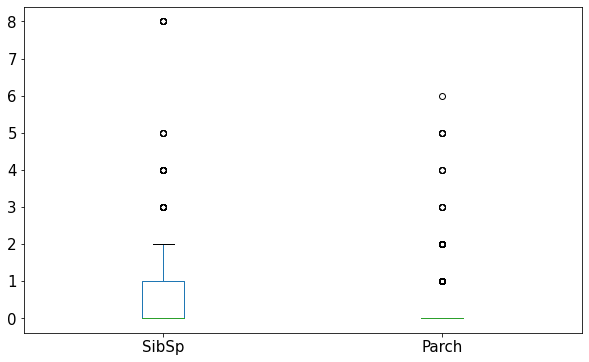

In [ ]:
# Checking for Outliers in train dataset(sibsp and parch columns)
train.boxplot(['SibSp', 'Parch'], grid=False, figsize=(10,6), fontsize=15)

# we observe some outliers but we wont be deleting any of them as they make sense 

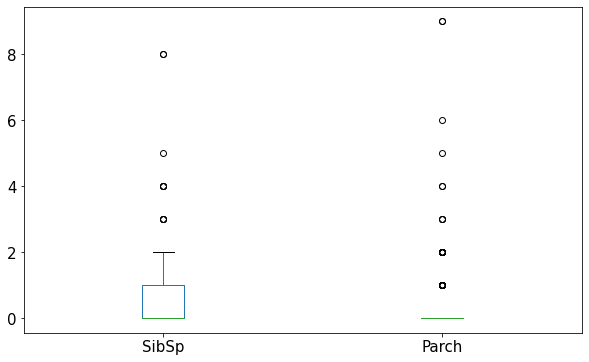

In [ ]:
# Checking for Outliers in test dataset(sibsp and parch columns)
test.boxplot(['SibSp', 'Parch'], grid=False, figsize=(10,6), fontsize=15)

# we observe some outliers but we wont be deleting any of them as they make sense 

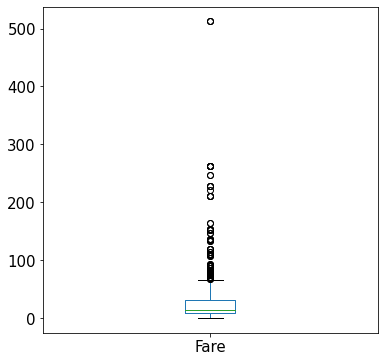

In [ ]:
# Checking for Outliers in train dataset(fare column)
train.boxplot(['Fare'], grid=False, figsize=(6,6), fontsize=15)

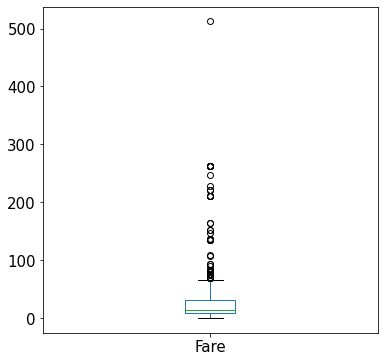

In [ ]:
# Checking for Outliers in test dataset(fare column)
test.boxplot(['Fare'], grid=False, figsize=(6,6), fontsize=15)

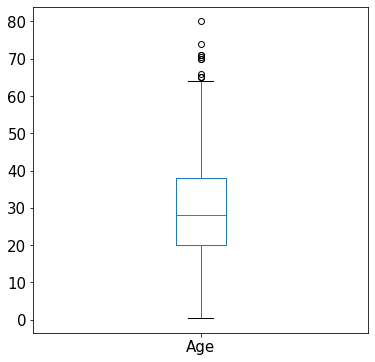

In [ ]:
# Checking for Outliers in train dataset(age column)
train.boxplot(['Age'], grid=False, figsize=(6,6), fontsize=15)

# we observe outliers in the age column from age 65 years. we wont be deleting any of these outliers because it is reasonable to 
# have a passenger over 65 years of age

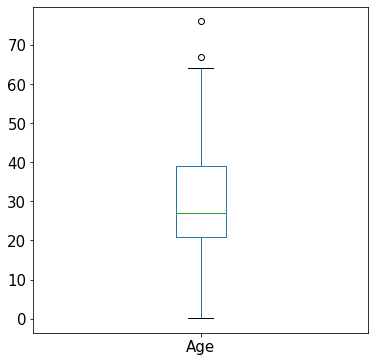

In [ ]:
# Checking for Outliers in test dataset(age column)
test.boxplot(['Age'], grid=False, figsize=(6,6), fontsize=15)
# we observe outliers two outliers in the age column. we wont be deleting any of these outliers because it is reasonable to 
# have a passenger over 65 years of age

In [ ]:
# Checking for Anomalies
# checking for duplicated records in train dataset
train.duplicated().value_counts()

# there are no duplicates in the train dataset

False    891
dtype: int64

In [ ]:
# checking for duplicated records in test dataset
test.duplicated().value_counts()

# there are no duplicated records in test dataset

False    418
dtype: int64

In [ ]:
# Identifying the Missing Data in train dataset
train.isnull().sum()

# we observe that cabin column has majority of the data missing, followed by age with about a quarter of the data missing.
# Embarked column has only two entries with missing values
# we will further explore on these columns below

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Identifying the Missing Data in test dataset
test.isnull().sum()

# for the test dataset, we observe that cabin column has majority of the values missing followed by age and fare

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Dealing with the Missing Data
# starting with train dateset, let's check on the unique values in cabin column
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

we observe a lot of unique values in both train and test datasets, which would make it hard to do any imputation. we will drop these columns

In [ ]:
# dropping cabin column in train dataset
train = train.drop('Cabin', axis=1)
train.head(1)
# cabin column has been dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
# dropping cabin column in test dataset
test = test.drop('Cabin', axis=1)
test.head(1)
# cabin column has been dropped

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
# moving on to the age column. let's get the statistical summary and mode of age column
# train dataset
print(train['Age'].describe())
print(train['Age'].mode())

# we observe that mean age = 29.699
# median = 28.000
# mode = 24.000

# test dataset

print(test['Age'].describe())
print(test['Age'].mode())

# we observe that mean age = 30.272
# median = 27.000
# mode = 21.0, and 24.0, we have two of them

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
0    24.0
dtype: float64
count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64
0    21.0
1    24.0
dtype: float64


In [ ]:
# for the age column, we will perfom imputation using the median.
# train dataset

train['Age'] = train['Age'].fillna(train['Age'].median())

In [ ]:
# test dataset
test['Age'] = test['Age'].fillna(test['Age'].median())

In [ ]:
# confirming that there are no missing values in age column
# train dataset
train.isnull().sum()
# all the missing values in the age column have been taken care of

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# test dataset
test.isnull().sum()

# all the missing values in the age column have been taken care of

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
# imputing the two missing values in the embarked column with mode
# train dataset
print(train['Embarked'].mode()) # checking the mode
# Southampton was the most popular station that the passengers embarked from

train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

0    S
dtype: object


In [ ]:
# dealing with missing value in fare column of test dataset
# checking for mean, mode and medium of fare column in test dataset
print(test['Fare'].mean())
print(test['Fare'].mode())
print(test['Fare'].median())

35.6271884892086
0    7.75
dtype: float64
14.4542


In [ ]:
# checking the record with the missing fare
test[test['Fare'].isnull()]
# given that the pa

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [ ]:
# imputing the missing fare with mode

test.Fare.fillna(test.Fare.mode()[0], inplace=True)

In [ ]:
# confirming that there are no missing values in all the columns in the train dataset

train.isnull().sum()

# all the missing values have been delt with in the train dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# confirming that there are no missing values in all the columns in the test dataset

test.isnull().sum()

# all the missing values have been delt with in the test dataset

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# More data cleaning procedures
# dropping unnecessary columns

# I dont see how passenger id, name, ticket, and title would affect classifying whether a passenger survived or not.
# we will drop these columns in both the train and test datasets

train.drop(['PassengerId','Name', 'Ticket'], axis =1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis =1, inplace=True)

In [ ]:
# confirming that the columns have been dropped
print(train.head(2))
print(test.head(2))
# the unnecessary columns have been dropped

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
   Pclass     Sex   Age  SibSp  Parch    Fare Embarked
0       3    male  34.5      0      0  7.8292        Q
1       3  female  47.0      1      0  7.0000        S


In [ ]:
# final shape of our datasets
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


In [ ]:
# renaming our cleaned datasets

df_train = train
df_test = test


## 6. Exploratory Analysis

Going forward we will use df_train to create our model. After which, we will use the df_test to evaluate our model

### Univariate analysis

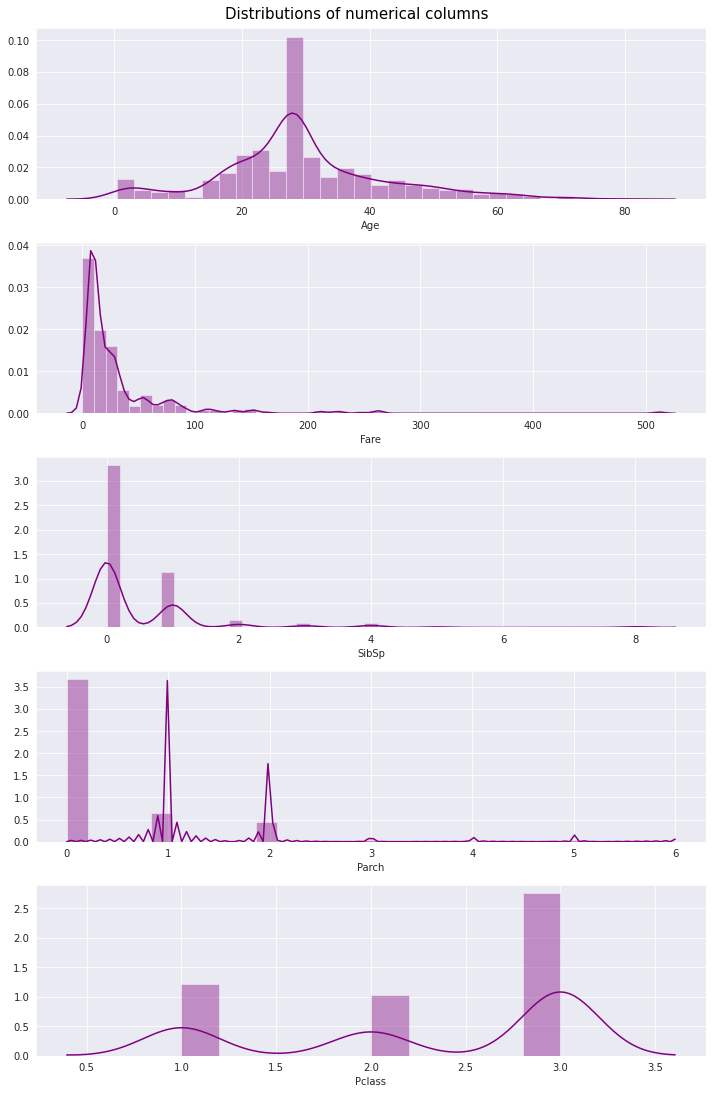

In [ ]:
dist_columns = ['Age','Fare', 'SibSp', 'Parch', 'Pclass']

sns.set_style('darkgrid')
fig, axes = plt.subplots(len(dist_columns), figsize = (10, 15))
fig.suptitle('Distributions of numerical columns', y= 1.01, color = 'black', fontsize = 15)

for ax, data, name in zip(axes.flatten(), df_train, dist_columns):
  sns.distplot(df_train[name], ax = ax, kde = True, color = 'purple')
plt.tight_layout()


We observe that:

 with fare, the data is skewed to the right

 with SibSp we have a multinomial distribution

 With Pclass we  have  multinomial distribution based on the different classes



### Bivariate analysis

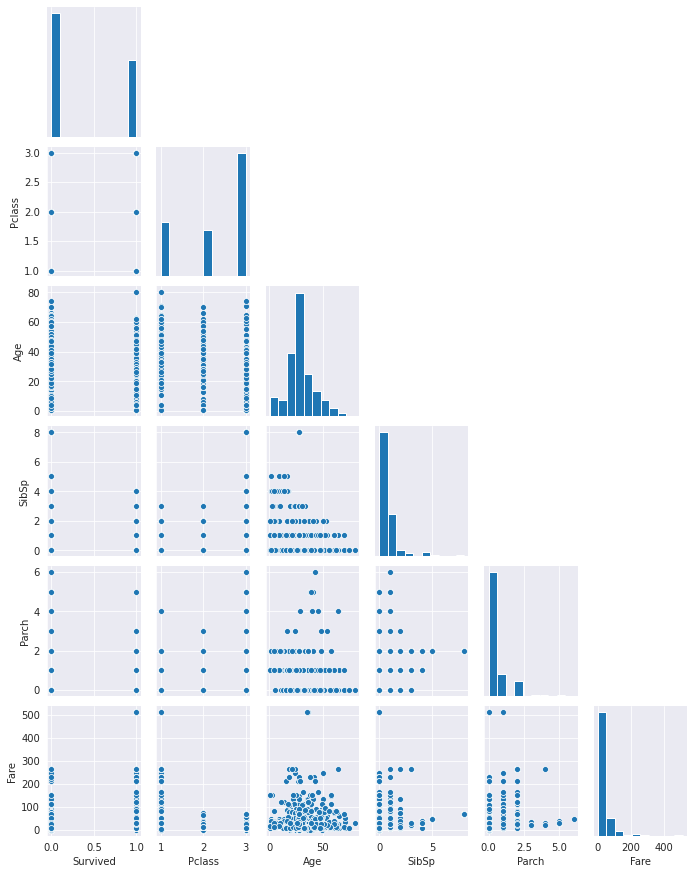

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_train, corner=True, aspect=0.8, height=2)

From the pair plots above, there is not much correlation among variables. let's check further with a heatmap

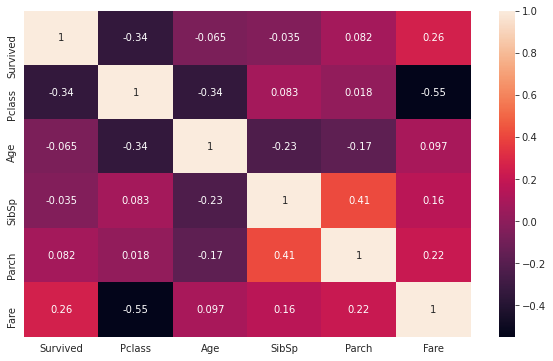

In [ ]:
# Heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_train.corr(), annot=True, ax=ax);

We observe that pclass has a strong inverse correlation to fare, meaning that passengers who paid more were in 1st class and vice versa

We also observe that pclass is moderately, inversely correlated to survived, which means that it's likely that the passengers who were in first class were likely to survive compared to those in third class

We also see a moderate correlation between fare and survived, meaning that passengers who paid more were likely to survive

The rest of the variables are weakly correlated to each other



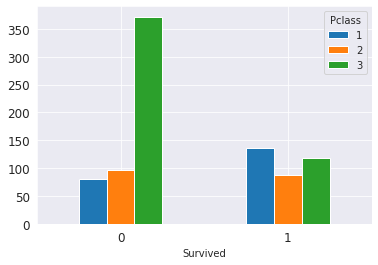

In [ ]:
# Barcharts — comparing target variable with features variables

pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='bar', fontsize=12, rot=0)

We observe that people in first class were more likely to survive compared to other classes. We also see that there was a higher population of people in the 3rd class compared to the other two classes

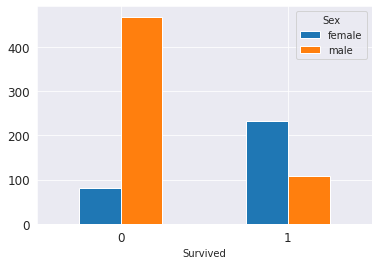

In [ ]:
pd.crosstab(df_train['Survived'], df_train['Sex']).plot(kind='bar', fontsize=12, rot=0)

More females survived compared to males

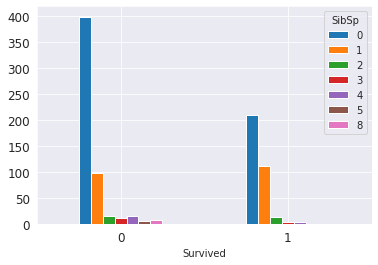

In [ ]:
pd.crosstab(df_train['Survived'], df_train['SibSp']).plot(kind='bar', fontsize=12, rot=0)

A lot of people travelled alone. The one's who travelled alone had a higher survival rate compared to people who had a lot of siblings or spouses 

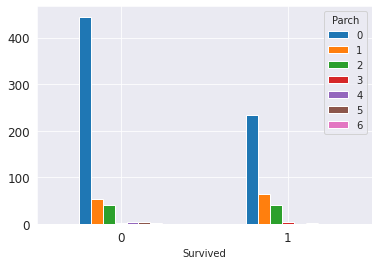

In [ ]:
pd.crosstab(df_train['Survived'], df_train['Parch']).plot(kind='bar', fontsize=12, rot=0)

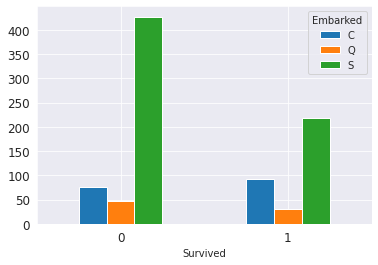

In [ ]:
pd.crosstab(df_train['Survived'], df_train['Embarked']).plot(kind='bar', fontsize=12, rot=0)

A lot more passengers who boarded from Southampton(s) survived, followed by Cherbourg (C) and finally Queenstown(Q)

## 7. Implementation the solution using K-Nearest Neighbors 

Preprocessing

In [ ]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:

# converting sex and embarked to categorical datatypes

df_train['Sex'] = df_train['Sex'].astype('category')
df_train['Embarked'] = df_train['Embarked'].astype('category')

In [ ]:
# encoding sex and embarked column

# sex column
df_train['Sex'] = df_train['Sex'].cat.codes
df_train['Sex'] = df_train['Sex'].astype(int)

In [ ]:
# embarked column
columns = ['Embarked']
df_train= pd.get_dummies(df_train, columns = columns)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
df_train['Embarked_C'] = df_train['Embarked_C'].astype('int64')
df_train['Embarked_Q'] = df_train['Embarked_Q'].astype('int64')
df_train['Embarked_S'] = df_train['Embarked_S'].astype('int64')

In [ ]:
df_train.dtypes
# Our data is ready for modeling

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

#### Using a test size of 20%

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values
# train using 80% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))

[[88 17]
 [36 38]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       105
           1       0.69      0.51      0.59        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.69       179



Observations: accuracy score is at 70 % which is pretty low

#### Using a test size of 30%

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values

# train using 70% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))

[[131  26]
 [ 54  57]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.51      0.59       111

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.68       268
weighted avg       0.70      0.70      0.69       268



Observations: Accuracy score remains at 70%

#### Using a test size of 40%

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values

# train using 60% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))

[[174  42]
 [ 60  81]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       216
           1       0.66      0.57      0.61       141

    accuracy                           0.71       357
   macro avg       0.70      0.69      0.69       357
weighted avg       0.71      0.71      0.71       357



Observations: Accuracy improves to 71%. We see the power of increasing the test data, the larger it is the accuracy score improves slightly. But wait, we did not perform feature scaling on our data, would that improve the accuracy further? let's check that out below

#### 20% test size with Feature scaling

In [ ]:
# In an attempt to improve the accuracy let's perform feature scaling on our data. This will make sure that
# all the feature variables are evaluated on uniformly on the same scale

# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values
# train using 80% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fitting the model and making predictions
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
survived_pred = classifier.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))


[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Observations: with feature scaling, and using 20% test data the accuracy has improved largely. Before feature scaling, at 20% test data the accuracy was 70%, it has improved to 80%

#### 30% test size with Feature scaling

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values
# train using 70% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))


[[138  19]
 [ 37  74]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



With 30% test data and feature scaling, the accuracy dropped a bit to 79% compared to using 20% test data with feature scaling. However, it is still an improvement from 70% before feature scaling. 

#### 40% test size with Feature scaling

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values
# train using 60% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))

[[188  28]
 [ 47  94]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       216
           1       0.77      0.67      0.71       141

    accuracy                           0.79       357
   macro avg       0.79      0.77      0.77       357
weighted avg       0.79      0.79      0.79       357



The accuracy remains the same here as above with 79%. What we are seeing is that increasing test data from 30% to 40% does not change the accuracy. Overall we see that feature scaling is important and the optimal test size for this problem is 20% as that gave as he highest accuracy of the model at 80% 

#### Optimization of KNN using Dimensionality Reduction with Linear Discriminant Analysis

In [ ]:
# splitting train data into features and target variable

X = df_train.iloc[:, 1:10].values
y = df_train.iloc[:, 0].values
# train using 80% of the train data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# perfoming LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
# print(X_train)
X_test = lda.transform(X_test)
# print(X_test)
# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
print(confusion_matrix(y_test, survived_pred))
print(classification_report(y_test, survived_pred))

[[94 11]
 [17 57]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



After performing LDA, our accuracy score has greatly improved from 80% to 84%. An improvement of 4% is really good. What we are learnig is that with feature scaling and optimization using LDA we get the best KNN model model.

For this problem we split the training data provided as both train and test to create our model. Now we need to use the test data (data provided with no label variable), which our model hasn't interacted with to check on the perfomance of our model with this unseen data. Let's continue below.

#### Testing our model with test data that was separately provided

In [ ]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# Preprocessing
# sex and embarked columns need to be encoded, let's do that

# converting sex and embarked to categorical datatypes
df_test['Sex'] = df_test['Sex'].astype('category')
df_test['Embarked'] = df_test['Embarked'].astype('category')
# sex column
df_test['Sex'] = df_test['Sex'].cat.codes
df_test['Sex'] = df_test['Sex'].astype(int)
# embarked column
columns = ['Embarked']
df_test= pd.get_dummies(df_test, columns = columns)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [ ]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
df_test['Embarked_C'] = df_test['Embarked_C'].astype('int64')
df_test['Embarked_Q'] = df_test['Embarked_Q'].astype('int64')
df_test['Embarked_S'] = df_test['Embarked_S'].astype('int64')

In [ ]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [ ]:
# splitting data into features and target
X_train = df_train.iloc[:, 1:10].values
y_train = df_train.iloc[:, 0].values
X_test  = df_test

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# perfoming LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
# print(X_train)
X_test = lda.transform(X_test)
# print(X_test)
# fitting the model and making predictions
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
survived_pred = clf.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score
acc_score = round(clf.score(X_train, y_train) * 100, 2)
print('Accuracy score using the test data = ', acc_score,'%')

Accuracy score using the test data =  84.4 %


With the test data provided, the optimized model has perfomed really well. With an accuracy score of 84.4% — an improvement of 0.4 % from the testing that we got earlier.

## 8. Conclusion and challenging the solution

Our best model created produced 84.4% accuracy which is pretty good, but could still be improved to 90%. To better improve our accuracy:

1. Test the model with distance metric optimization

2. I would fit the data with other classifiers such as Random Forests and check on which model perfoms best

3. I would also look for ways of creating more insighful new features and use them to create the model
